# CSC 478: Assignment 2
### Sarah Cummings

In [281]:
#read in the necessary libraries
import matplotlib
import math
import operator
import sys
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.lda import LDA
#from sklearn import cross_validation

### Question 1: KNN with the news groups dataset

In [314]:
#read in the training data file and labels
train=np.loadtxt(r"/Users/sarahcummings/Documents/csc478/newsgroups/trainMatrixModified.txt")
trainDf = train.T
labels = np.genfromtxt(r"/Users/sarahcummings/Documents/csc478/newsgroups/trainClasses.txt",delimiter='\t',usecols=(1),dtype=int)
test=np.loadtxt(r"/Users/sarahcummings/Documents/csc478/newsgroups/testMatrixModified.txt")
testDf = test.T
test_labels = np.genfromtxt(r"/Users/sarahcummings/Documents/csc478/newsgroups/testClasses.txt",delimiter='\t',usecols=(1),dtype=int)

#print(labels)

#### A) Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors.  Your classifier should work with Euclidean distance as well as Cosine Similarity. 

In [315]:
#note: some code borrowed from Mombasher's knn_search example function
#http://facweb.cs.depaul.edu/mobasher/classes/CSC478/Notes/Docs-Terms-Distances.html

def myKNN(x,D,labels,K,method):
    #find K nearest neighbors of x among D
    if method == 0:
        distances = sqrt(((D - x)**2).sum(axis=1))
    elif method == 1:
        D_norm = array([linalg.norm(D[i]) for i in range(len(D))])
        x_norm = linalg.norm(x)
        cosines = dot(D,x)/(D_norm * x_norm)
        distances = 1 - cosines
    
    idx = np.argsort(distances) 
    countClasses={}
    for i in range(K):
        vote = labels[idx[i]]
        countClasses[vote] = countClasses.get(vote,0) + 1
    topClass = sorted(countClasses.items(), key=operator.itemgetter(1), reverse=True)
    return topClass[0][0], idx[:K]


#### B) Create a function to compute the classification accuracy over the test data set. This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.

In [316]:

def accuracyKNN(A,x,D,labels,K,method):
    instances = len(A)
    error=0.0

    for i in range(instances):
        result,neigh_idx= myKNN(x[i,:],D,labels,K,method)
        if (result  !=A[i]):
            error += 1.0
    totalError = error/float(instances)
    accuracy= 1-totalError
    return accuracy

#### C) Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure.
#### Try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table 

In [327]:

result = np.zeros((20,3), dtype=float)
for i in range(0,20):
    accuracyEuc = accuracyKNN(test_labels,testDf,trainDf, labels, i+1, 0)
    accuracyCos = accuracyKNN(test_labels, testDf, trainDf,labels, i+1, 1)
    result[i] = [i+1, accuracyEuc, accuracyCos]
    
print("Results:")
print(" K  Euclid  Cosine")
for row in result:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]) )

Results:
 K  Euclid  Cosine
 1   0.78    0.98
 2   0.78    0.98
 3   0.81    0.97
 4   0.81    0.98
 5   0.81    0.97
 6   0.83    0.98
 7   0.77    0.98
 8   0.80    0.98
 9   0.75    0.97
10   0.85    0.98
11   0.80    0.98
12   0.84    0.97
13   0.78    0.98
14   0.81    0.98
15   0.79    0.98
16   0.80    0.98
17   0.76    0.97
18   0.79    0.97
19   0.74    0.97
20   0.77    0.97


#### D) Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights, Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [325]:
# referece: Mobasher's Term-Doc Matrix and TF*IDF
# concatenate the df
concatData = np.concatenate((train, test), axis=1)

# Find document frequencies 
DF = np.array([(concatData !=0).sum(1)]).T
NDocs = len(concatData [0,:])
# Create a matrix with all entries =NDocs
NMatrix = np.ones(np.shape(concatData ), dtype=float)*NDocs
print(NMatrix)

[[ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
 [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
 [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
 ..., 
 [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
 [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]
 [ 1000.  1000.  1000. ...,  1000.  1000.  1000.]]


In [ ]:
# Convert each entry into IDF values
IDF = log2(divide(NMatrix, DF))
# Compute the TF x iDF values for each document term
TD_tfidf = concatData  * IDF

In [326]:
# Transpose the data
DT_tfidf = TD_tfidf.T
trainNum = 0.8 * len(DT_tfidf)
trainDT_tfidf = DT_tfidf[:trainNum,:]
testDT_tfidf = DT_tfidf[trainNum:,:]

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [332]:
# Repeat the results printing likek before
results2= np.zeros((20,3), dtype=float)
for i in range(0,20):
    accuracyEuc = accuracyKNN(testLabels, testDT_tfidf, trainDT_tfidf, labels, i+1, 0)
    accuracyCos = accuracyKNN(testLabels, testDT_tfidf, trainDT_tfidf, labels, i+1, 1)
    #print "%2d,  %.2f,   %.2f" % (i, errorRateEuc, errorRateCos)
    results2[i] = [i+1, accuracyEuc, accuracyCos]

In [333]:
for row in results2:
    print("%2.0f   %.2f    %.2f" % (row[0], row[1], row[2]) )

 1   0.72    0.95
 2   0.72    0.95
 3   0.74    0.97
 4   0.72    0.97
 5   0.80    0.97
 6   0.83    0.97
 7   0.73    0.98
 8   0.74    0.99
 9   0.69    0.99
10   0.74    0.98
11   0.68    0.99
12   0.71    0.99
13   0.65    0.99
14   0.68    0.99
15   0.60    0.99
16   0.64    0.99
17   0.59    0.99
18   0.68    0.99
19   0.63    0.99
20   0.67    0.99


#### Note: above are K- Euclid- Cosine for the TFx IDF weights data

#### Comparing theh results to the previous accuracy results (part C), we find that the original method works better for small values of k with both distanc methods. For larger values of  k with the cosine method, our new function is better. For larger values of k and the Euclid method, the original function is still better.   

#### E) Create a classifier based on the Rocchio Method adapted for text categorization. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class.

### Question 2: Classification using scikit-learn and the bank dataset
#### A) Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. 

In [41]:
#load the data
bank_df=pd.read_csv(r"/Users/sarahcummings/Documents/csc478/bank_data.csv",encoding = "ISO-8859-1", low_memory=False)
bank_df.head()
#bank_df.shape

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [70]:
#Remove pep from the data frame, and userID
depVars=bank_df.ix[:,1:11]
depVars.head()

#Pull target varaible 
pep=bank_df.ix[:,11:12]
pep.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [71]:
#Convert into standard spreadsheet format, like in last assignment

# make binary varaibles in spreadsheet format
depVars.replace(to_replace = ['YES', 'NO'], value = [1.0, 0.0], inplace=True)

#make dummy variables for other columns
depVars_numeric= pd.get_dummies(depVars)
depVars_numeric.head()



,age,income,children,married,car,savings_acct,current_acct,mortgage,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,48,17546.0,1,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
1,40,30085.1,3,1.0,1.0,0.0,1.0,1.0,0,1,0,0,0,1
2,51,16575.4,0,1.0,1.0,1.0,1.0,0.0,1,0,1,0,0,0
3,23,20375.4,3,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1
4,57,50576.3,0,1.0,0.0,1.0,0.0,0.0,1,0,0,1,0,0


In [88]:
# min_max scale the numeric data
from sklearn.preprocessing import MinMaxScaler
depVars_numeric

scaler = MinMaxScaler()
depVars_numeric[['age', 'income', 'children']] = scaler.fit_transform(depVars_numeric[['age', 'income', 'children']])
depVars_numeric.head()


,age,income,children,married,car,savings_acct,current_acct,mortgage,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN
0,0.612245,0.215634,0.333333,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0
1,0.448980,0.431395,1.000000,1.0,1.0,0.0,1.0,1.0,0,1,0,0,0,1
2,0.673469,0.198933,0.000000,1.0,1.0,1.0,1.0,0.0,1,0,1,0,0,0
3,0.102041,0.264320,1.000000,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1
4,0.795918,0.783987,0.000000,1.0,0.0,1.0,0.0,0.0,1,0,0,1,0,0


In [89]:
#create 80-20 split 
#like in video store sklearn example
X_train, X_test, y_train, y_test = train_test_split(depVars_numeric, pep, test_size=0.2, random_state = 33)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(480, 14) (120, 14) (480, 1) (120, 1)


#### B) Run scikit-learn's KNN classifier on the test set. Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy, and discuss.

In [94]:
from sklearn import neighbors, tree, naive_bayes

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, y_train)


/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [98]:
knnpreds_test = knnclf.predict(X_test)
print(knnpreds_test)

['NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO']


In [99]:
## run a classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.64      0.70      0.67        66
        YES       0.58      0.52      0.55        54

avg / total       0.61      0.62      0.61       120



In [101]:
#create a confusion matrix
from sklearn.metrics import confusion_matrix
knncm = (confusion_matrix(y_test, knnpreds_test))
print(knncm)


[[46 20]
 [26 28]]


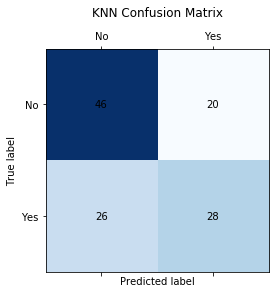

In [102]:
# Use matplot lib to visualize the confusion matrix
plt.matshow(knncm, cmap = plt.cm.Blues)
plt.title("KNN Confusion Matrix\n")
plt.xticks([0,1], ['No', 'Yes'])
plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(knncm.shape[0]):
    for x in range(knncm.shape[1]):
        plt.text(x, y, '{}'.format(knncm[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

In [103]:
#try other values of k and discuss how the model improves.

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, y_train)
knnpreds_test = knnclf.predict(X_test)
print(classification_report(y_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.64      0.65      0.65        66
        YES       0.57      0.56      0.56        54

avg / total       0.61      0.61      0.61       120



/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [104]:
n_neighbors = 7
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, y_train)
knnpreds_test = knnclf.predict(X_test)
print(classification_report(y_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.65      0.71      0.68        66
        YES       0.60      0.54      0.57        54

avg / total       0.63      0.63      0.63       120



/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [105]:
n_neighbors = 9
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, y_train)
knnpreds_test = knnclf.predict(X_test)
print(classification_report(y_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.67      0.68      0.68        66
        YES       0.60      0.59      0.60        54

avg / total       0.64      0.64      0.64       120



/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


##### From our expirimentation, we can see that as we increase the k.

#### C) Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [119]:
#repeat the process with the decision tree classifier
treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 10, random_state = 9)
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)


print(treepreds_test)


['NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES'
 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES']


In [120]:
#compare teh accuracy on the test set and training set
print(treeclf.score(X_test, y_test))

0.85


In [121]:
print(treeclf.score(X_train, y_train))

0.910416666667


In [122]:
#generate the confusion matrix
treecm = confusion_matrix(y_test, treepreds_test, labels=['YES','NO'])
print(treecm)

[[40 14]
 [ 4 62]]


In [123]:
#generate the classification report
print(classification_report(y_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.82      0.94      0.87        66
        YES       0.91      0.74      0.82        54

avg / total       0.86      0.85      0.85       120



In [124]:
#repeat thhe process with the naive Bayes (Gaussian) classifier.
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(X_train, y_train)
nbpreds_test = nbclf.predict(X_test)
print(nbpreds_test)


['NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES'
 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES'
 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO']


/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
#compare teh accuracy on the train set and test set
print(nbclf.score(X_train, y_train))

0.645833333333


In [127]:
print(nbclf.score(X_test, y_test))

0.608333333333


In [128]:
#generate the confusion matrix
NBcm = confusion_matrix(y_test, nbpreds_test, labels=['YES','NO'])
print(treecm)

[[40 14]
 [ 4 62]]


In [129]:
#generate the classification report
print(classification_report(y_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.63      0.70      0.66        66
        YES       0.57      0.50      0.53        54

avg / total       0.61      0.61      0.60       120



#### D) Discuss your observations based on the above experiments.

##### As seen in the corresping classification reports, the decision tree method produced the most accurate results.The decision tree method produced an accuracy  0.85 for the test set. The NB method, on the other hand, had an accuracy of 0 .6083. The KNN methods all stayed around an accuracy of 0.63 depending on theh k selected.


### Question 3: Data Analysis and Predictive Modeling on Census data 
#### A) Preprocessing and data analysis:

In [133]:
#Examine the data for missing values.
adult_df= pd.read_csv(r"/Users/sarahcummings/Documents/csc478/adult-modified.csv")
adult_df.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [135]:
adult_df.shape

(10000, 8)

In [137]:
adult_df.dtypes

age               object
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [139]:
adult_df.describe(include="all")
#note there are issues with finding mean, likely because NAs are indicated with ?

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,10000,10000,10000.000000,10000,10000,10000,10000.000000,10000
unique,72,4,NaN,2,5,2,NaN,2
top,31,Private,NaN,Single,White,Male,NaN,<=50K
freq,284,6947,NaN,5017,8556,6703,NaN,7621
mean,NaN,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,NaN,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,NaN,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [147]:
#change missing numeric values to column mean
adult_df.age[adult_df['age'] == '?'] = int(adult_df.age[adult_df['age'] != '?'].astype(int).mean())
#run code below to confirm the ?s are removed- row 21 had a ?
#adult_df.head(25)



/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [148]:
#replace the ? with NA in the categorical columns
adult_dfNew = adult_df.replace('?', np.NaN)
#drop the NAs
adult_dfNew = adult_dfNew.dropna()
#check the shape to confirm they've dropped
adult_dfNew.shape



(9412, 8)

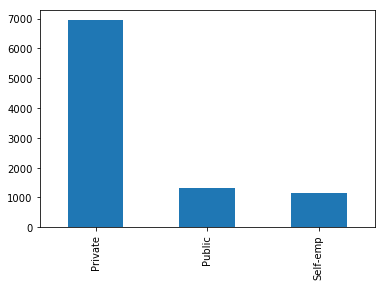

In [158]:
#Examine the chracteristics
#work class bar plot
adult_dfNew['workclass'].value_counts().plot(kind='bar')

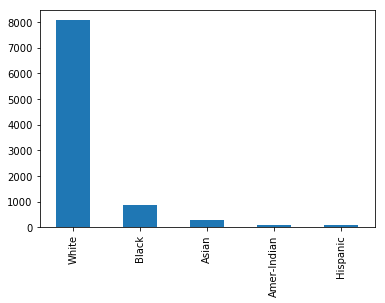

In [159]:
#race barplot
adult_dfNew['race'].value_counts().plot(kind='bar')

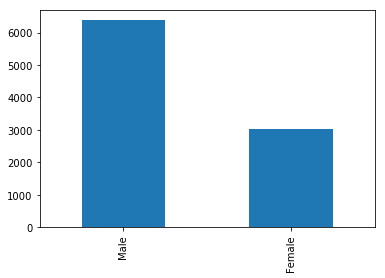

In [160]:
#gender barplot
adult_dfNew['sex'].value_counts().plot(kind='bar')

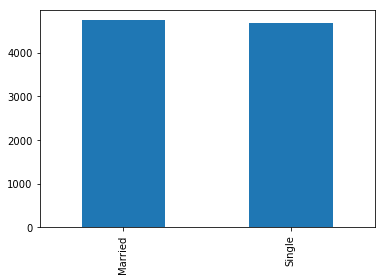

In [161]:
#barplot of marital status
adult_dfNew['marital-status'].value_counts().plot(kind='bar')

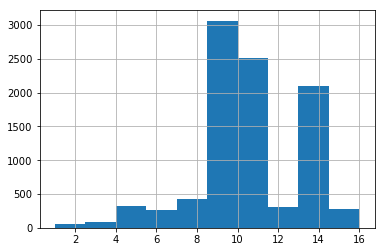

In [162]:
#histograpm of education level
adult_dfNew['education'].hist()

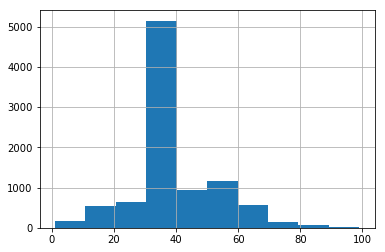

In [163]:
#histogram of hours worked
adult_dfNew['hours-per-week'].hist()

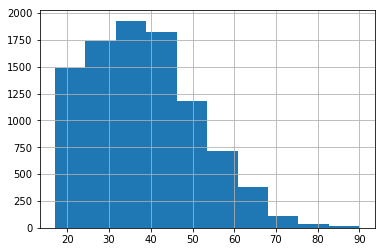

In [166]:
#convert age to int
adult_dfNew['age']=pd.to_numeric(adult_dfNew['age'])
#histogram of hours worked
adult_dfNew['age'].hist()

In [167]:
#exaine the data characteristics
adult_dfNew.describe(include="all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


In [168]:
# Create Cross-Tabs and Graphs
#Cross Tab of education and race
ct1= pd.crosstab(adult_dfNew.education, adult_dfNew.race)
ct1

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,11
2,0,1,4,3,38
3,0,4,5,1,71
4,5,5,14,6,150
5,0,3,19,2,118
6,8,3,30,4,223
7,4,6,49,4,261
8,0,2,17,3,78
9,35,67,350,23,2590


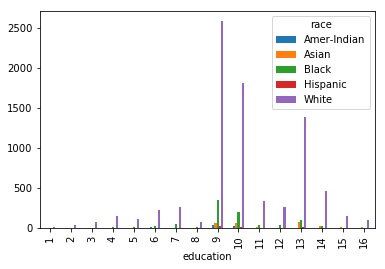

In [169]:
ct1.plot(kind="bar")

In [170]:
# Cross Tab of work-class+income
ct2=pd.crosstab(adult_dfNew.workclass, adult_dfNew.income)
ct2

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


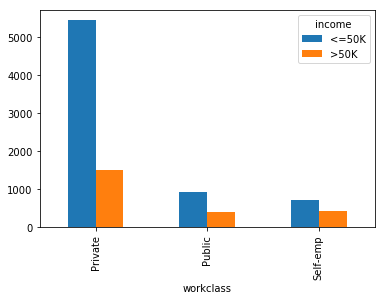

In [171]:
ct2.plot(kind='bar')

In [172]:
# Cross Tab of work-class+race
ct3=pd.crosstab(adult_dfNew.workclass, adult_dfNew.race)
ct3

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


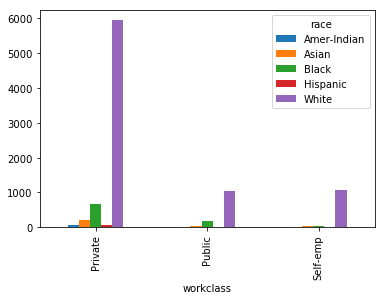

In [173]:
ct3.plot(kind='bar')

In [175]:
#Cross tab of race and income
ct4=pd.crosstab(adult_dfNew.race, adult_dfNew.income)
ct4

income,<=50K,>50K
race,,
Amer-Indian,83,9
Asian,224,67
Black,773,119
Hispanic,69,6
White,5944,2118


In [176]:
#Also create a table or chart showing percentages of each race category that fall in the low-income group.
ct4.apply(lambda r: r/r.sum(), axis=1)

income,<=50K,>50K
race,,
Amer-Indian,0.902174,0.097826
Asian,0.769759,0.230241
Black,0.866592,0.133408
Hispanic,0.920000,0.080000
White,0.737286,0.262714


#### As seen in the table above, the majority of all races fall in the less thn 50k group. A significantly hogher portion of whiles and asians have an income over 55k. Only 8 percent of hispanics make greater than 50k, which is lower than all the races.

In [177]:
#Compare and contrast the characteristics of the low-income and high-income categories
#look at how sex varies accross income
pd.crosstab(adult_dfNew.sex, adult_dfNew.income).apply(lambda r: r/r.sum(), axis=1)



income,<=50K,>50K
sex,,
Female,0.881149,0.118851
Male,0.693091,0.306909


In [179]:
#look at how income varies across marital status
pd.crosstab(adult_dfNew['marital-status'], adult_dfNew.income).apply(lambda r: r/r.sum(), axis=1)


income,<=50K,>50K
marital-status,,
Married,0.576314,0.423686
Single,0.933262,0.066738


In [181]:
#look at how income varies across work class
pd.crosstab(adult_dfNew['workclass'], adult_dfNew.income).apply(lambda r: r/r.sum(), axis=1)


income,<=50K,>50K
workclass,,
Private,0.783504,0.216496
Public,0.702354,0.297646
Self-emp,0.631533,0.368467


#### From the analysis above, we see that members of the private class are most likely to make more than 50k, where as those who are self employed are least likely. Even more notably, single people are signifcantly more likely to make less than 50k (93.32%) than married people (57.63%). Finally, 30% of males make more than 50k where only 11.88% of females make more than 50k. 

#### B) Predictive Modeling and Model Evaluation


In [185]:
#  Create dummy variables for the categorical attributes. Then separate the target attribute ("income>50K") from the attributes used for training.
adult_dfNew = pd.get_dummies(adult_dfNew)
adult_dfNew.head(n=5)


,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [186]:
# Drop income<=50K
adult_dfNew = adult_dfNew.drop('income_<=50K', 1)
adult_dfNew.head(n=5)

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,0


In [188]:
# Seperate target attribute ("income>50K") from the attributes used for training.
y = adult_dfNew['income_>50K']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [197]:
# Pull target from rest of set
adult_dfNew = adult_dfNew.drop('income_>50K', 1)
adult_dfNew.head()



,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0


In [202]:
#Create a training testing split
X_train, X_test, y_train, y_test = train_test_split(adult_dfNew, y, test_size=.2)

In [203]:
#Use scikit-learn to build classifiers uisng Naive Bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(X_train, y_train)
nbpreds_test = nbclf.predict(X_test)
print(nbpreds_test)

[0 1 1 ..., 1 1 1]


In [204]:
print(nbclf.score(X_train, y_train))

0.719351839554


In [205]:
print (nbclf.score(X_test, y_test))

0.709506107276


In [210]:
# 10-fold cross validation for our NB model
cv_scores = cross_validation.cross_val_score(nbclf, adult_dfNew, y, cv=10)
cv_scores

array([ 0.72823779,  0.70488323,  0.73142251,  0.70456961,  0.73326249,
        0.70669501,  0.7120085 ,  0.7183847 ,  0.73113709,  0.70744681])

In [211]:
# Compute the overall accuracy
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.72 (+/- 0.02)


In [206]:
#Use scikit-learn to build a decision tree
treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 10, random_state = 9)
treeclf = treeclf.fit(X_train, y_train)
treepreds_test = treeclf.predict(X_test)


print(treepreds_test)

[0 0 0 ..., 0 1 0]


In [213]:
print (treeclf.score(X_test, y_test))

0.799787573022


In [215]:
print (treeclf.score(X_train, y_train))

0.845530614956


In [216]:
#10-fold cross validation for our decision tree
cv_scores = cross_validation.cross_val_score(treeclf, adult_dfNew, y, cv=10)
cv_scores

array([ 0.79193206,  0.79723992,  0.7940552 ,  0.81190223,  0.80552604,
        0.80871413,  0.78639745,  0.81509033,  0.79702444,  0.8106383 ])

In [217]:
# Compute the overall accuracy
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.80 (+/- 0.02)


In [218]:
#Use scikit-learn to build an LDA model
ldclf = LDA()
ldclf = ldclf.fit(X_train, y_train)
ldpreds_test = ldclf.predict(X_test)
print (ldpreds_test)

[0 0 0 ..., 0 1 0]


/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [220]:
print (ldclf.score(X_train, y_train))

0.806880063753


In [221]:
print (ldclf.score(X_test, y_test))

0.809877854488


In [223]:
# 10-fold cross validation for our LDA model
cv_scores = cross_validation.cross_val_score(ldclf, adult_dfNew, y, cv=10)
cv_scores

/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Applications/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("V

array([ 0.81210191,  0.80997877,  0.79193206,  0.81721573,  0.80977683,
        0.78958555,  0.79914984,  0.80871413,  0.82040383,  0.81702128])

In [224]:
# Compute the overall accuracy
print("Overall Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Overall Accuracy: 0.81 (+/- 0.02)


## Extra Credit:
### Make a visual for the decision tree


In [226]:
from sklearn import tree
from StringIO import StringIO

ModuleNotFoundError: No module named 'StringIO'